<a href="https://colab.research.google.com/github/adrianriverar/Simulacion-II/blob/main/ProblemaTarea_productoEmpresa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problema Tarea - Ejercicio para clase**
Una empresa dedicada a la comercialización de un producto de mucho éxito quiere determinar el número de unidades que debe comprar con el objetivo de satisfacer la demanda de sus clientes los próximos meses. La distribución de las ventas de los últimos tres años se recoge en la tabla siguiente.
$$$$

|Unidades vendidas|100|200|300|400|500|600|
|-|-|-|-|-|-|-|
|Frecuencia (meses)|8|9|4|9|4|2|

$$$$
El coste de cada unidad de producto asciende a 750 euros, siendo su precio de venta unitario de 1000 euros. Se sabe que dentro de un mes saldrá al mercado un nuevo modelo de características muy superiores al modelo actual. Cuando esto ocurra la empresa podrá devolver al distribuidor las unidades sobrantes del modelo actual y este le indemnizará con 250 euros por cada unidad retornada.
$$$$

# **Resolución**
## **1. Identifique las variables.**

Tenemos una: 

1.   $X:=$ Unidades vendidas en un mes.

## **2. Determine la distribución de probabilidad.**

Debido a los datos proporcionados durante el planteamiento del problema, se sigue que la variable aleatoria $\,X\,$ posee una distribución discreta no uniforme.

## **3. Modele las variables aleatorias.**

Utilizamos la frecuencia relativa de cada cantidad de unidades vendidas en el periodo de los últimos tres años para estimar la distribución del número de unidades vendidas en un mes. Se sigue que
$$$$

|$X$|100|200|300|400|500|600|
|-|-|-|-|-|-|-|
|$P(X)$|$\frac{2}{9}$|$\frac{1}{4}$|$\frac{1}{9}$|$\frac{1}{4}$|$\frac{1}{9}$|$\frac{1}{18}$|

$$$$
## **4. Defina el modelo del sistema y los objetivos de la simulación.**

Sea el beneficio de la empresa cuando las unidades vendidas en un mes son menores que las unidades compradas para un mes; es decir, cuando $\,X < \mathrm{Pedido}\,$, expresado mediante la siguiente fórmula.
$$$$

$$B_x(X) = 1000X + 250(\mathrm{Pedido} - X) - 750(\mathrm{Pedido}) = 750X - 500(\mathrm{Pedido})$$

$$$$
Y sea el beneficio de la empresa cuando las unidades vendidas son mayores o iguales al número de unidades compradas para su venta; es decir, cuando $\,X\geq\mathrm{Pedido}\,$, expresado mediante la siguiente fórmula.
$$$$

$$B_X(X) = 250(\mathrm{Pedido})$$

### **Objetivo:**

Calcular el beneficio esperado en cada caso (unidades compradas para su venta) y verificar en qué caso este es mayor.

Por lo tanto, implementamos el siguiente código:

In [2]:
import random
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [3]:
n_unidades = [100, 200, 300, 400, 500, 600]
long = len(n_unidades)

In [4]:
def observacion():
  X = np.random.choice([100, 200, 300, 400, 500, 600], p = [2/9, 0.25, 1/9, 0.25, 1/9, 1/18])
  return X

In [5]:
observacion()

200

## **5. Diseñe el experimento.**

In [6]:
def experimento_un_caso(n, pedido):
  sum_beneficio = 0
  evol_prom = []
  for i in range(n):
    X = observacion()
    if X < pedido:
      beneficio = 750*X - 500*pedido
    else:
      beneficio = 250*pedido
    sum_beneficio += beneficio
    evol_prom.append(sum_beneficio/(i+1))
  return evol_prom

Ahora analizamos la convergencia para cada caso.

In [8]:
colores = ['r', 'orange', 'b', 'g', 'm', 'k']

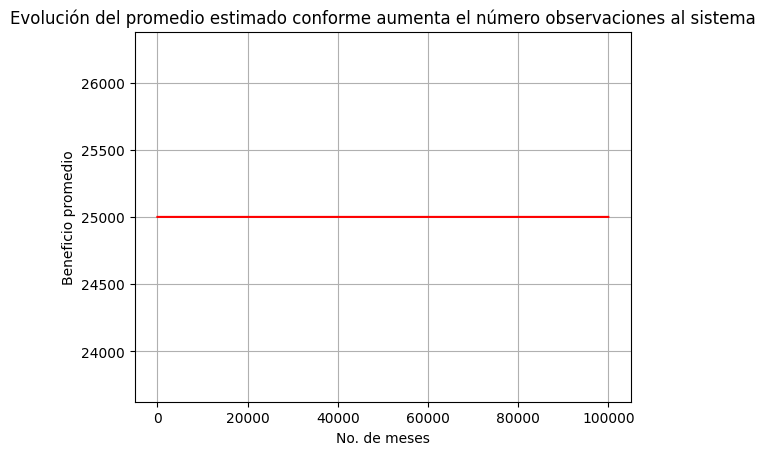

In [20]:
evol_prom = experimento_un_caso(100000, 100)
evol_proms = [evol_prom]

plt.plot(evol_prom, colores[0])   
plt.xlabel('No. de meses')    
plt.ylabel('Beneficio promedio')
plt.grid(True)
plt.title('Evolución del promedio estimado conforme aumenta el número observaciones al sistema')
plt.show()

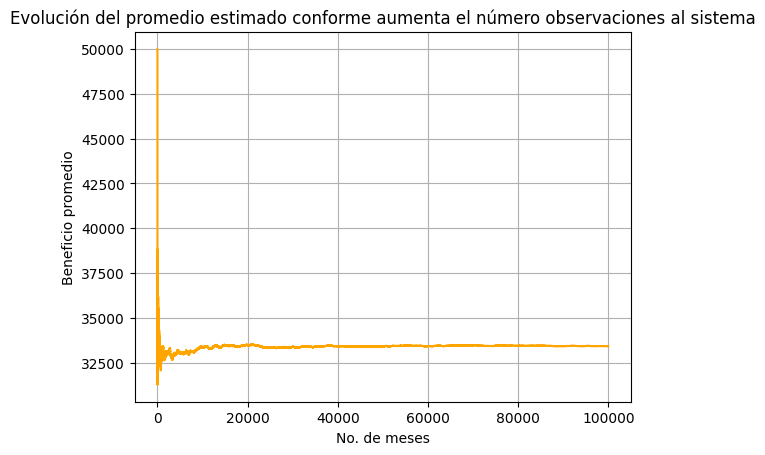

In [21]:
evol_prom = experimento_un_caso(100000, 200)
evol_proms.append(evol_prom)

plt.plot(evol_prom, colores[1])   
plt.xlabel('No. de meses')    
plt.ylabel('Beneficio promedio')
plt.grid(True)
plt.title('Evolución del promedio estimado conforme aumenta el número observaciones al sistema')
plt.show()

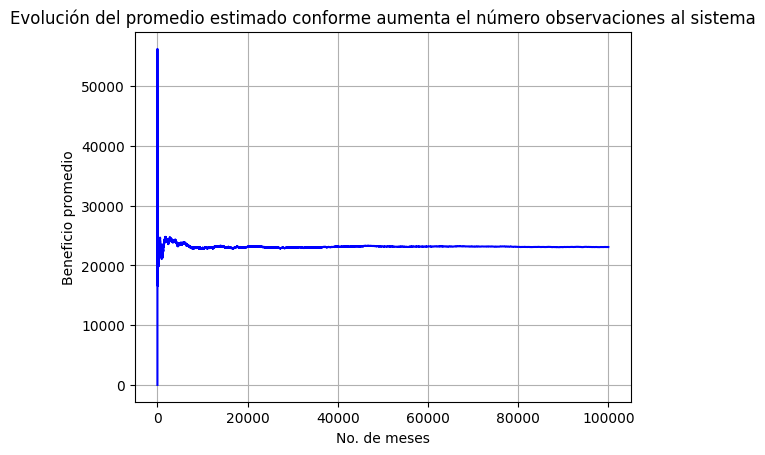

In [22]:
evol_prom = experimento_un_caso(100000, 300)
evol_proms.append(evol_prom)

plt.plot(evol_prom, colores[2])   
plt.xlabel('No. de meses')    
plt.ylabel('Beneficio promedio')
plt.grid(True)
plt.title('Evolución del promedio estimado conforme aumenta el número observaciones al sistema')
plt.show()

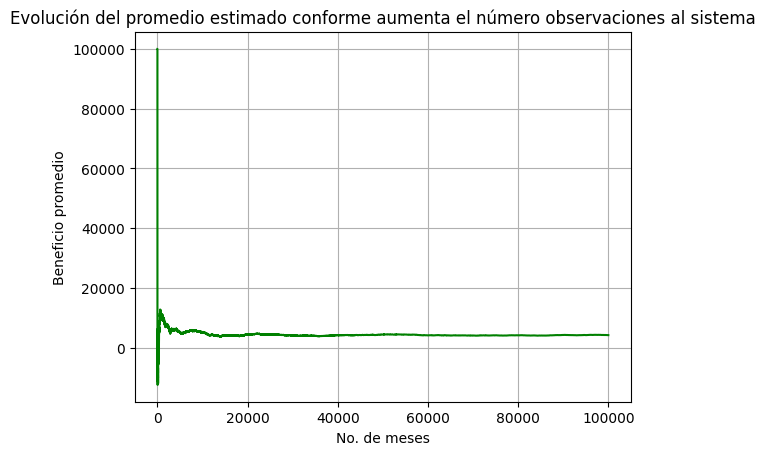

In [23]:
evol_prom = experimento_un_caso(100000, 400)
evol_proms.append(evol_prom)

plt.plot(evol_prom, colores[3])   
plt.xlabel('No. de meses')    
plt.ylabel('Beneficio promedio')
plt.grid(True)
plt.title('Evolución del promedio estimado conforme aumenta el número observaciones al sistema')
plt.show()

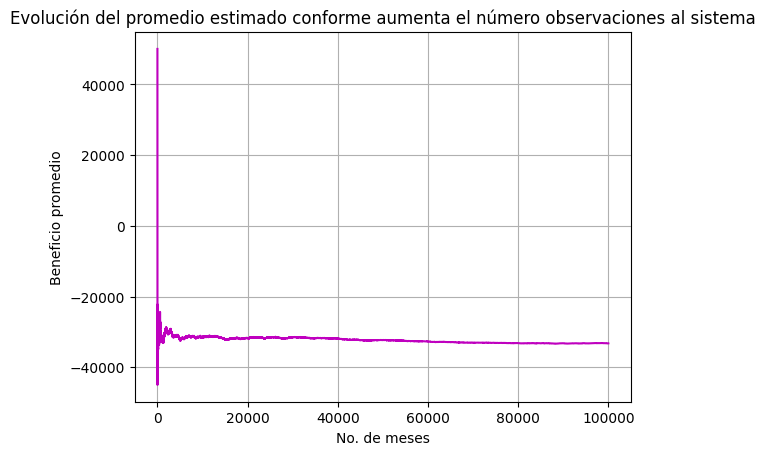

In [24]:
evol_prom = experimento_un_caso(100000, 500)
evol_proms.append(evol_prom)

plt.plot(evol_prom, colores[4])   
plt.xlabel('No. de meses')    
plt.ylabel('Beneficio promedio')
plt.grid(True)
plt.title('Evolución del promedio estimado conforme aumenta el número observaciones al sistema')
plt.show()

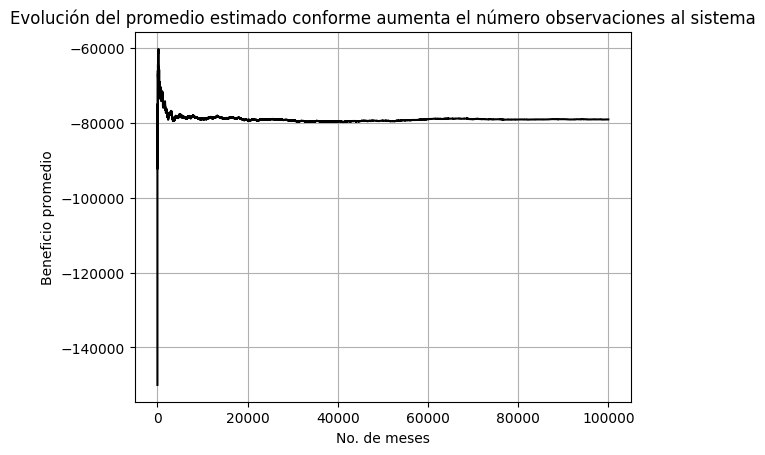

In [25]:
evol_prom = experimento_un_caso(100000, 600)
evol_proms.append(evol_prom)

plt.plot(evol_prom, colores[5])   
plt.xlabel('No. de meses')    
plt.ylabel('Beneficio promedio')
plt.grid(True)
plt.title('Evolución del promedio estimado conforme aumenta el número observaciones al sistema')
plt.show()

In [69]:
n = [1, 40000, 40000, 50000, 60000, 50000]

In [27]:
for pedido in range(long):
  print(n_unidades[pedido],': mu =', np.mean(evol_proms[pedido]), ', sigma =', np.std(evol_proms[pedido]))

100 : mu = 25000.0 , sigma = 0.0
200 : mu = 33386.72943964132 , sigma = 212.639106231228
300 : mu = 23143.8617522719 , sigma = 417.3443755585586
400 : mu = 4341.050826028859 , sigma = 1074.5070611719136
500 : mu = -32340.097388660444 , sigma = 890.8181974691828
600 : mu = -79010.48414354246 , sigma = 1177.3476587044247


## **6. Repita el experimento $N$ veces.**

Primero, necesitamos determinar el número $N$ de veces necesarias que se debe simular el experimento para que la probabilidad estimada de que ocurra la observación deseada difiera de su valor verdadero en menos de $\epsilon$ con un nivel de confianza del $(1 − \alpha)\%$.

Este número $N$ está dado por

  \begin{align*}
  N > \left( \frac{2 \sigma Z_{\alpha/2}}{\epsilon} \right)^2
  \end{align*}

Implementamos el siguiente código:

In [28]:
epsilon = 0.01    # Establecer la cota superior epsilon para el error del promedio estimado.
alpha = 0.05      # Indicar el grado de significancia que tendrá el valor establecido para epsilon.

In [30]:
N = []
for pedido in range(long):
  N.append(int(np.ceil((2 * np.std(evol_proms[pedido]) * norm.ppf(1 - alpha / 2) / epsilon)**2)))
print(N)

[0, 6947722273, 26763647633, 177408621362, 121936670860, 212993143080]


In [41]:
N = [100]*5
N.insert(0, 0)
print(N)

[0, 100, 100, 100, 100, 100]


In [32]:
def simulacion(N, n, n_unidades):
  prom = [[] for _ in range(len(n_unidades))]
  pedido = 0
  for N_sub in N:
    for i in range(N_sub):
      evol_prom = experimento_un_caso(n[pedido], n_unidades[pedido])
      prom[pedido].append(np.mean(evol_prom))
    pedido += 1
  return prom

In [42]:
prom = simulacion(N, n, n_unidades)

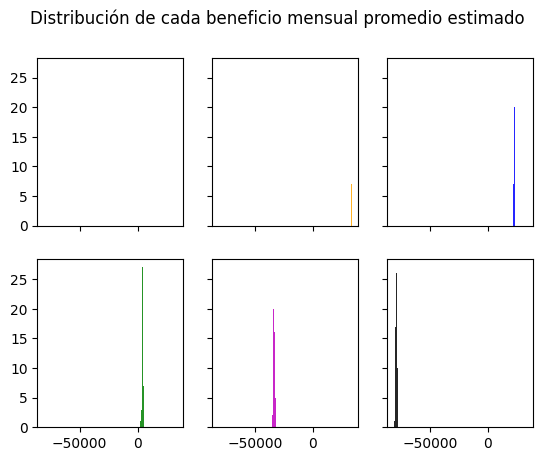

In [43]:
fig, axs = plt.subplots(2, 3, sharex = True, sharey = True)
fig.suptitle('Distribución de cada beneficio mensual promedio estimado')
pedido = 0
for i in range(2):
  for j in range(3):
    axs[i, j].hist(prom[pedido], color = colores[pedido], alpha = 0.85)
    pedido += 1

for ax in axs.flat:
    ax.label_outer()

plt.show()

In [66]:
prom[0] = [25000]
for pedido in range(long):
  print(n_unidades[pedido],': mu =', np.mean(prom[pedido]), ', sigma =', np.std(prom[pedido]))

100 : mu = 25000.0 , sigma = 0.0
200 : mu = 33328.023402686 , sigma = 227.28995755539034
300 : mu = 22910.3490153375 , sigma = 370.8899824631137
400 : mu = 4204.746972590476 , sigma = 612.6472989042702
500 : mu = -33262.44831711233 , sigma = 648.316032722558
600 : mu = -79032.53779522507 , sigma = 691.0291353826173


## **7. Hallamos el intervalo de confianza.**

Utilizamos la fórmula
  \begin{align*}
  \bar{x} - Z_{\frac{\alpha}{2}}\frac{s}{\sqrt{n}} < \mu < \bar{x} + Z_{\frac{\alpha}{2}}\frac{s}{\sqrt{n}}
  \end{align*}

Implementamos el siguiente código:

In [70]:
mu = []
for pedido in range(long):
  mu.append(np.mean(prom[pedido]))
  li = mu[pedido] - norm.ppf(1 - alpha / 2) * np.std(prom[pedido]) / np.sqrt(n[pedido])
  ls = mu[pedido] + norm.ppf(1 - alpha / 2) * np.std(prom[pedido]) / np.sqrt(n[pedido])
  print(n_unidades[pedido], ':', li, '<', mu[pedido], '<', ls)

100 : 25000.0 < 25000.0 < 25000.0
200 : 33325.79600203172 < 33328.023402686 < 33330.25080334028
300 : 22906.714360298225 < 22910.3490153375 < 22913.983670376772
400 : 4199.376980921346 < 4204.746972590476 < 4210.116964259605
500 : -33267.63583046477 < -33262.44831711233 < -33257.260803759884
600 : -79038.59482135865 < -79032.53779522507 < -79026.48076909149


## **8. Comparamos con la solución analítica.**

Determinamos el valor esperado del beneficio para cada escenario, analizando cada caso (unidades compradas). 

Sea $\,X < \mathrm{Pedido}\,$, entonces
$$$$

$$E[B_x(X)] = \frac{2}{9}B_x(100) + \frac{1}{4}B_x(200) + \frac{1}{9}B_x(300) + \frac{1}{4}B_x(400) + \frac{1}{9}B_x(500) + \frac{1}{18}B_x(600)$$

$$$$
Y ahora sea $\,X\geq\mathrm{Pedido}\,$, entonces
$$$$

$$E[B_X(X)] = \frac{2}{9}B_X(100) + \frac{1}{4}B_X(200) + \frac{1}{9}B_X(300) + \frac{1}{4}B_X(400) + \frac{1}{9}B_X(500) + \frac{1}{18}B_X(600)$$

$$$$
Implementamos el siguiente código para calcular cada esperanza sin escribir a lo wey.

In [71]:
prob = [2/9, 0.25, 1/9, 0.25, 1/9, 1/18]
EB_x, EB_X = [],[]
for caso in n_unidades:
  sum_x, sum_X = 0,0
  for p, X in zip(prob, n_unidades):
    sum_x += p*(750*X - 500*caso)
    sum_X += p*250*caso    
  EB_x.append(sum_x)
  EB_X.append(sum_X)
print(EB_x)
print(EB_X)

[170833.33333333334, 120833.33333333331, 70833.33333333334, 20833.33333333333, -29166.666666666657, -79166.66666666667]
[25000.0, 50000.0, 75000.0, 100000.0, 124999.99999999999, 150000.0]


Ahora, las distribuciones de probabilidad acumuladas, estimadas mediante las frecuencias relativas acumuladas, de que las ventas sean mayores, iguales o menores que el número de unidades compradas al distribuidor para cada caso son como se expresan en la siguiente tabla.
$$$$

|Unidades compradas|$P(\text{vendidas} < \text{compradas})$|$P(\text{vendidas} = \text{compradas})$|$P(\text{vendidas} > \text{compradas})$|$\Sigma$|
|-|-|-|-|-|
|100|$0$|$\frac{2}{9}$|$\frac{7}{9}$|1|
|200|$\frac{2}{9}$|$\frac{1}{4}$|$\frac{19}{36}$|1|
|300|$\frac{17}{36}$|$\frac{1}{9}$|$\frac{5}{12}$|1|
|400|$\frac{7}{12}$|$\frac{1}{4}$|$\frac{1}{6}$|1|
|500|$\frac{5}{6}$|$\frac{1}{9}$|$\frac{1}{18}$|1|
|600|$\frac{17}{18}$|$\frac{1}{18}$|$0$|1|

$$$$
Se sigue que el valor esperado del beneficio esperado estimado anteriormente; es decir, el verdadero beneficio esperado se calcula mediante la siguiente fórmula.
$$$$

$$B = P(X < \mathrm{Pedido})\cdot E[B_x(X)] + P(X\geq\mathrm{Pedido})\cdot E[B_X(X)]$$


$$$$
Por lo tanto, implementamos el siguiente código.

In [72]:
acum = []
sum = 0
for i in range(long):
  sum += prob[i]
  acum.append(sum)

mu_ana = []
for i in range(long):
  p_x, p_X = 0,0
  for j in range(long):
    if acum[j] < acum[i]:
      p_x += prob[j]
    else:
      p_X += prob[j]
  mu_ana.append(p_x*EB_x[i] + p_X*EB_X[i])
print(mu_ana)

[25000.0, 65740.74074074074, 73032.40740740742, 53819.44444444444, -3472.2222222222154, -66435.1851851852]


# **Solución**

In [76]:
print('El el valor esperado del beneficio esperado en cada caso son:')

for caso in range(long):
  print(n_unidades[caso],'unidades compradas:   beneficio esperado =', mu[caso], 'euros.')
print('\n\n')

print('Los cuales difieren, respectivamente, de la solución analítica en un ')
for caso in range(long):
  print(str(abs(mu[caso] - mu_ana[caso])*100 / mu_ana[caso]) + '%.')
print('\n\n')

print('Por lo tanto, el número de unidades que debe comprar la empresa para maximizar su ganancia es de', n_unidades[mu.index(max(mu))], 'unidades.')

El el valor esperado del beneficio esperado en cada caso son:
100 unidades compradas:   beneficio esperado = 25000.0 euros.
200 unidades compradas:   beneficio esperado = 33328.023402686 euros.
300 unidades compradas:   beneficio esperado = 22910.3490153375 euros.
400 unidades compradas:   beneficio esperado = 4204.746972590476 euros.
500 unidades compradas:   beneficio esperado = -33262.44831711233 euros.
600 unidades compradas:   beneficio esperado = -79032.53779522507 euros.



Los cuales difieren, respectivamente, de la solución analítica en un 
0.0%.
49.303851725491725%.
68.6298866097439%.
92.18730885092866%.
-857.958511532837%.
-18.9618687370635%.



Por lo tanto, el número de unidades que debe comprar la empresa para maximizar su ganancia es de 200 unidades.
